In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.svm import SVC
from sklearn import preprocessing

In [47]:

#define input path
diabetes_path = 'diabetes.csv'
path = 'heart.csv'
heart_data = pd.read_csv(path)

def load_dataset():
    csv_path=os.path.join(path)
    return pd.read_csv(csv_path)
df=load_dataset()


classifier = SVC(kernel='linear', C=2.0)

In [48]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139

In [49]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [50]:
normalized_df=(df-df.min())/(df.max()-df.min())
#std_df = sklearn.preprocessing.MinMaxScaler.fit(df) #variable name: standardized_df

TypeError: fit() missing 1 required positional argument: 'X'

In [51]:
from sklearn.preprocessing import StandardScaler
x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.transform(features_test)

C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


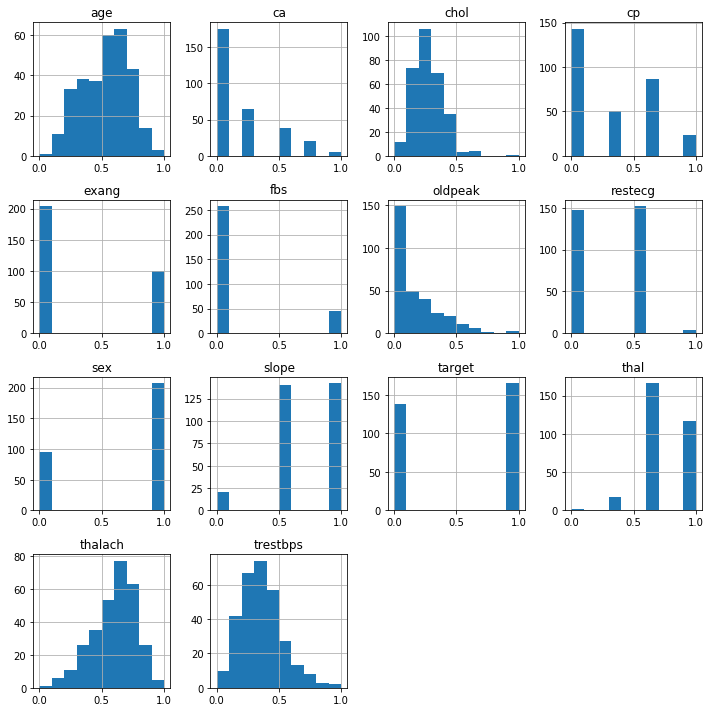

In [52]:
normalized_df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

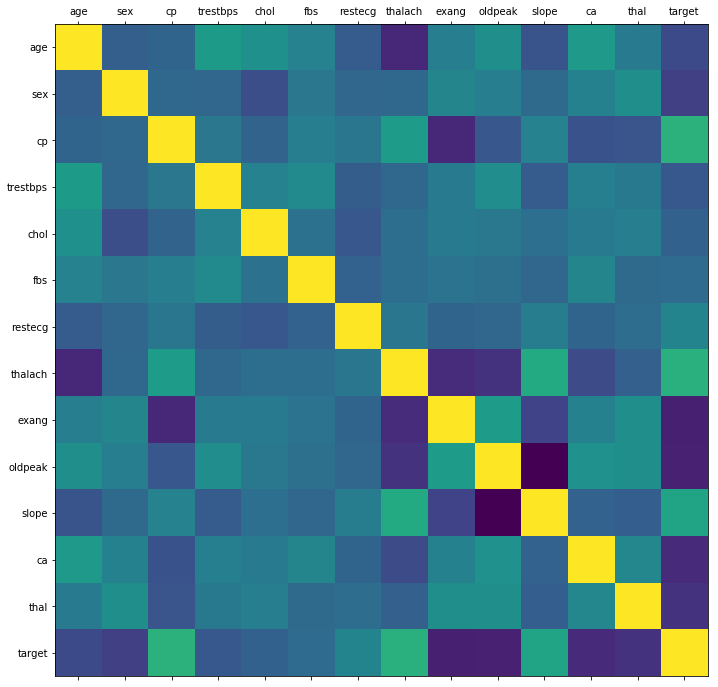

In [53]:
corr = df.corr()
fig, ax = plt.subplots(figsize =(12,12))

ax.matshow(corr)

plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [54]:
features = df.drop(['target'], axis=1)
labels = df['target']

df.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [58]:
X = df.drop(columns=['target'])
    
y = df['target']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=10)

from sklearn.preprocessing import StandardScaler
x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(X_train)
features_test_scaled = x_sc.transform(X_test)

C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [165]:
# Create training and test set 
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
train_test_split(features, labels, test_size=0.10)

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.transform(features_test)

clf = sklearn.svm.SVC(kernel='linear', C=1.0)
clf.fit(features_train_scaled, labels_train)
y_pred = clf.predict(features_test_scaled)
sklearn.metrics.accuracy_score(labels_test,y_pred)

C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


0.9354838709677419

In [ ]:
# Create training and test set 
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
train_test_split(features, labels, test_size=0.10)

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.transform(features_test)

clf = sklearn.svm.SVC(kernel='linear', C=1.0)
clf.fit(features_train_scaled, labels_train)
y_pred = clf.predict(features_test_scaled)
sklearn.metrics.accuracy_score(labels_test,y_pred)